In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import pandas as pd
from scipy.stats import norm
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.optimize import minimize_scalar  

In [3]:
rahbek_data = pd.read_csv("../Daten/Option_prices_2018_1.csv", sep=';')

# Siu et al 2004 Gamma Garch Option Pricing

In [23]:
def Y(r,v,a,h,Xt):
    """equation 3.12 siu et al"""
    return 0.0057 - (a*h)**0.5 + Xt
    return r + v*h**0.5 - 0.5* h - (a*h)**0.5 + Xt
def h(omega,alpha,beta,a,ht,Xt):
    """equation 3.13 siu et al"""
    return omega + alpha*(Xt - (a*ht)**0.5)**2 + beta*ht
def htalt(a,v,h):
    """equation 3.14 siu et al"""
    return a**2 * (1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a))
def X(a,b):
    """returns gamma / Xt in siu et al"""
    return np.random.gamma(a, b, 1)[0] 
def b(v,h,a):
    """equation 3.11 in siu et al"""
    return 1/((1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a)))

def b(mu,r,h,a):
    """equation 3.11 in siu et al NEW const mean"""
    return 1/((1- np.exp(( mu - r - (a*h)**0.5)/a)))
    #return 1/((1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a)))

def Y(mu, a, h, X):
    """eq 3.12 new const mean"""
    return mu - (a*h)**0.5 + X

In [151]:
np.var(s)

0.8655752695232505

In [152]:
np.mean(s)

0.8614473879238387

In [153]:
stats.skew(s)

2.1303243484002943

In [154]:
stats.kurtosis(s)

6.621336312104537

In [159]:
#help(np.random.gamma)

In [155]:
omega = 0.00003577
alpha = 0.155966
beta = 0.646049
v = 0.04873824 # lambda in siu et al
r = 0.001 # risk free rate r
ht = 0.01206 # starting value for variance
#ht = 5
a = 1/2 # shape parameter for gamma distribution
print ("{:<6} {:<6} {:<6} {:<6}".format('bt','Xt','ht', "Yt"))

myb = []
myX = []
myh = []
myY = []
T = 50
for i in range(T):
    bt = b(v,ht,a)
    Xt = X(a, bt)
    ht = h(omega,alpha,beta,a,ht,Xt)
    #ht = htalt(a,v,ht)
    Yt = Y(r,v,a,ht,Xt)
    #print ("{:<6.4f} {:<6.4f} {:<6.4f} {:<6.4f}".format( bt, Xt, ht, Yt))
    myb.append(bt), myX.append(Xt), myh.append(ht), myY.append(Yt) 
    

bt     Xt     ht     Yt    


In [64]:
def sim_option_price_sdf(series, S_t, K, horizon, par, draws, r):
    np.random.seed(123)
    omega = par[0]/100**2
    alpha = par[1]
    beta = par[2]
    mu = par[3]
    a = par[4]
        
    S_T = np.zeros(draws)
    temp = np.zeros(draws)  
    
    for i in range(draws):
        ret = np.zeros(horizon)
        theta = np.zeros(horizon)
        sdf = np.zeros(horizon)    
        s = np.var(series) #sigma2[-1]
            
        for j in range(horizon):
            bt = b(mu, r, s, a)
            #print(f"bt = {bt}")
            Xt = X(a,bt) 
            #print(f"Xt = {Xt}")
            s = h(omega, alpha, beta, a, s, Xt)
            #print(f"s = {s}")
            ret[j] = Y(mu, a, s , Xt)
            #print(f"ret = {ret[j]}")
            theta[j] = (a/s)**0.5 - bt
            sdf[j] = np.exp(theta[j]*ret[j])/np.exp( ((1+theta[j])**2 * s)/2)
            #s = omega + alpha*(ret[j]-mu)**2 + beta*s    
            
        rsum = np.sum(ret)
        S_T[i] = S_t * np.exp(rsum)
        prodsdf = np.product(sdf)
        temp[i] = prodsdf * (S_T[i]-K)*(S_T[i]>K)
        
    return np.mean(temp), np.var(temp)**0.5

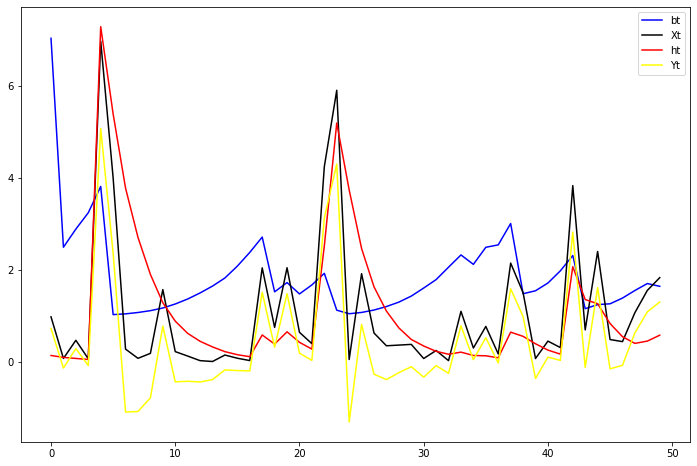

In [157]:
plt.figure(figsize = (12,8))
plt.subplot(111)
plt.plot(myb, color = "blue", label = "bt")
plt.plot(myX, color = "black", label = "Xt")
plt.plot(myh, color = "red", label = "ht")
plt.plot(myY, color = "yellow", label = "Yt")
plt.legend()

In [158]:
np.mean(myY)

0.46330530591640234